In [1]:
import folium
import folium.plugins
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from geocode.geocode import Geocode

In [2]:
sns.set_style("ticks")

# Users Analysis

This notebook contains analysis of popular GitHub users.

The analysis is based on lists of top 5000 users by the number of followers.
The data were obtained on 2024-07-14 using scripts in the repository.

Note that we also have a list of top 5000 users by the number of their public repositories, but it is not correct due to a GitHub API bug, so it will not be used.

## Preparation

First, we need to load a list of top 5000 users by followers.

In [3]:
df = pd.read_json("../data/users-by-followers.json")
df.set_index("id", inplace=True)

In [4]:
df.sort_values(by="followers_count", ascending=False)

,type,username,url,name,homepage,email,company,location,hireable,created_at,updated_at,followers_count,following_count,public_repositories_count,public_gists_count
id,,,,,,,,,,,,,,,
1024025,User,torvalds,https://github.com/torvalds,Linus Torvalds,None,None,Linux Foundation,"Portland, OR",False,2011-09-03 15:26:22+00:00,2023-11-12 20:08:30+00:00,211474,0,7,0
499550,User,yyx990803,https://github.com/yyx990803,Evan You,http://evanyou.me,None,None,Singapore,False,2010-11-28 01:05:40+00:00,2024-07-08 02:37:34+00:00,100272,95,193,73
810438,User,gaearon,https://github.com/gaearon,dan,None,dan.abramov@gmail.com,@bluesky-social,None,False,2011-05-25 18:18:31+00:00,2024-07-05 19:12:22+00:00,87173,173,270,78
8683378,User,gustavoguanabara,https://github.com/gustavoguanabara,Gustavo Guanabara,http://www.cursoemvideo.com,None,Curso em Vídeo,"Rio de Janeiro, Brazil",False,2014-09-07 03:56:50+00:00,2024-04-06 14:57:57+00:00,87126,3,6,0
241138,User,karpathy,https://github.com/karpathy,Andrej,https://twitter.com/karpathy,andrej.karpathy@gmail.com,None,Stanford,False,2010-04-10 17:55:32+00:00,2024-05-20 10:08:52+00:00,82228,8,55,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522448,Organization,Xinyuan-LilyGO,https://github.com/Xinyuan-LilyGO,LILYGO team,www.lilygo.cc,lily@lilygo.cc,None,China,False,2019-01-09 10:03:45+00:00,2024-02-28 03:55:39+00:00,1296,0,176,0
71647983,User,YeshwanthKM,https://github.com/YeshwanthKM,Yesh Coder,https://kmyeshwanth.whjr.site/,None,yeshwanth2307@gmail.com,Earth,False,2020-09-21 13:06:36+00:00,2024-03-18 12:43:22+00:00,1296,5422,50,0
48950,User,joewalnes,https://github.com/joewalnes,Joe Walnes,https://twitter.com/joewalnes,joe@walnes.com,None,San Francisco Bay Area,False,2009-01-24 12:19:26+00:00,2024-06-10 22:14:46+00:00,1296,23,90,24


In [5]:
df["type"].value_counts()

type
User            4316
Organization     684
Name: count, dtype: int64

We can see that most of the popular accounts are individual users, while only around 700 are organizations.

## Numerical Properties

For a start, we will analyze some numerical properties that indicate the user's popularity and activity.

### Number of Followers

#### All Accounts

In [6]:
df["followers_count"].describe()

count      5000.000000
mean       3786.023400
std        6223.823847
min        1296.000000
25%        1628.000000
50%        2202.000000
75%        3665.500000
max      211474.000000
Name: followers_count, dtype: float64

<Axes: xlabel='Number of followers', ylabel='Frequency (log)'>

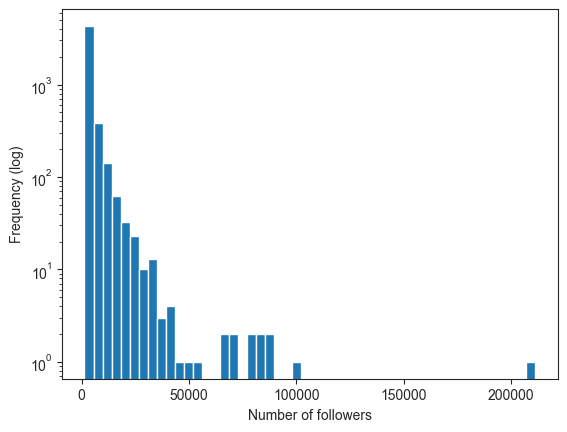

In [7]:
df["followers_count"].plot.hist(bins=50, logy=True, xlabel="Number of followers", ylabel="Frequency (log)")

In [8]:
display(df[df["followers_count"] > 5_000].shape[0])
display(df[df["followers_count"] > 10_000].shape[0])
display(df[df["followers_count"] > 50_000].shape[0])
display(df[df["followers_count"] > 100_000].shape[0])

792

288

14

2

Almost all accounts have less than 5000 followers, and only less than 800 accounts have more.

#### User Accounts

In [9]:
users = df[df["type"] == "User"]

In [10]:
users["followers_count"].describe()

count      4316.000000
mean       3781.380445
std        6280.506841
min        1296.000000
25%        1631.000000
50%        2203.000000
75%        3659.500000
max      211474.000000
Name: followers_count, dtype: float64

<Axes: xlabel='Number of followers', ylabel='Frequency (log)'>

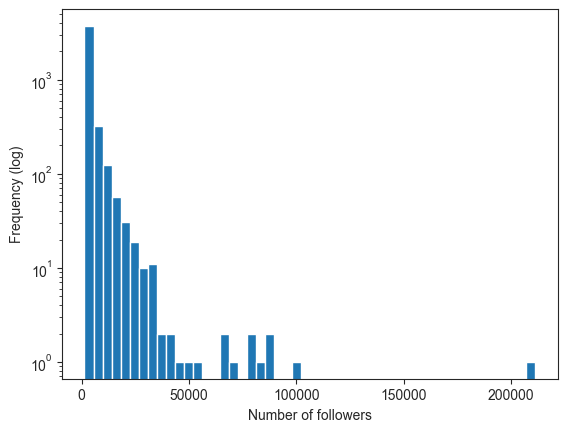

In [11]:
users["followers_count"].plot.hist(bins=50, logy=True, xlabel="Number of followers", ylabel="Frequency (log)")

In [12]:
users.sort_values(by="followers_count", ascending=False).head()

,type,username,url,name,homepage,email,company,location,hireable,created_at,updated_at,followers_count,following_count,public_repositories_count,public_gists_count
id,,,,,,,,,,,,,,,
1024025,User,torvalds,https://github.com/torvalds,Linus Torvalds,None,None,Linux Foundation,"Portland, OR",False,2011-09-03 15:26:22+00:00,2023-11-12 20:08:30+00:00,211474,0,7,0
499550,User,yyx990803,https://github.com/yyx990803,Evan You,http://evanyou.me,None,None,Singapore,False,2010-11-28 01:05:40+00:00,2024-07-08 02:37:34+00:00,100272,95,193,73
810438,User,gaearon,https://github.com/gaearon,dan,None,dan.abramov@gmail.com,@bluesky-social,None,False,2011-05-25 18:18:31+00:00,2024-07-05 19:12:22+00:00,87173,173,270,78
8683378,User,gustavoguanabara,https://github.com/gustavoguanabara,Gustavo Guanabara,http://www.cursoemvideo.com,None,Curso em Vídeo,"Rio de Janeiro, Brazil",False,2014-09-07 03:56:50+00:00,2024-04-06 14:57:57+00:00,87126,3,6,0
241138,User,karpathy,https://github.com/karpathy,Andrej,https://twitter.com/karpathy,andrej.karpathy@gmail.com,None,Stanford,False,2010-04-10 17:55:32+00:00,2024-05-20 10:08:52+00:00,82228,8,55,9


There are only two users (and accounts overall) with 100.000 followers.
That are Linus Torvalds and Evan You, both very popular and known open source developers.

#### Organization Accounts

In [13]:
organizations = df[df["type"] == "Organization"]

In [14]:
organizations["followers_count"].describe()

count      684.000000
mean      3815.320175
std       5857.799322
min       1296.000000
25%       1607.000000
50%       2191.500000
75%       3711.750000
max      81928.000000
Name: followers_count, dtype: float64

<Axes: xlabel='Number of followers', ylabel='Frequency (log)'>

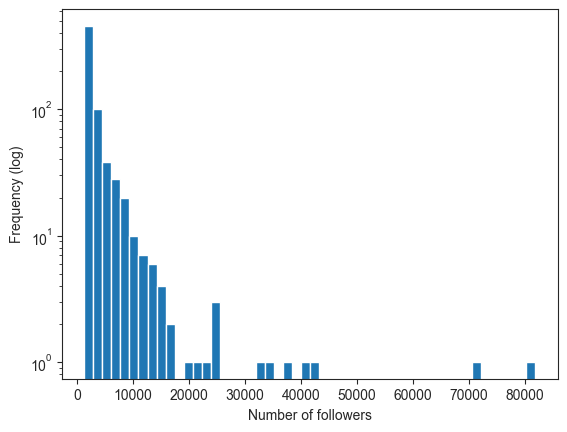

In [15]:
organizations["followers_count"].plot.hist(bins=50, logy=True, xlabel="Number of followers", ylabel="Frequency (log)")

In [16]:
organizations.sort_values(by="followers_count", ascending=False).head()

,type,username,url,name,homepage,email,company,location,hireable,created_at,updated_at,followers_count,following_count,public_repositories_count,public_gists_count
id,,,,,,,,,,,,,,,
14957082,Organization,openai,https://github.com/openai,OpenAI,https://openai.com/,None,None,None,False,2015-10-03 19:34:05+00:00,2024-06-26 16:58:47+00:00,81928,0,169,0
6154722,Organization,microsoft,https://github.com/microsoft,Microsoft,https://opensource.microsoft.com,opensource@microsoft.com,None,"Redmond, WA",False,2013-12-10 19:06:48+00:00,2024-02-09 18:50:14+00:00,71498,0,6271,0
1342004,Organization,google,https://github.com/google,Google,https://opensource.google/,opensource@google.com,None,United States of America,False,2012-01-18 01:30:18+00:00,2024-04-19 18:36:13+00:00,42910,0,2660,0
9919,Organization,github,https://github.com/github,GitHub,https://github.com/about,None,None,"San Francisco, CA",False,2008-05-11 04:37:31+00:00,2022-11-29 19:44:55+00:00,40604,0,496,0
20487725,Organization,TheAlgorithms,https://github.com/TheAlgorithms,The Algorithms,https://the-algorithms.com/,hello@the-algorithms.com,None,India,False,2016-07-16 08:17:02+00:00,2021-05-08 06:44:32+00:00,37811,0,48,0


We can see that there are fewer organizations with many followers than individual users.
The most popular organization is OpenAI with over 80.000 followers, followed by Microsoft with more than 70.000.
The third most popular organization is Google with around 43.000 followers, followed closely by GitHub with around 40.000.

### Number of Following

In [17]:
users["following_count"].describe()

count      4316.000000
mean       1314.667285
std       11847.406372
min           0.000000
25%           2.000000
50%          18.000000
75%          82.000000
max      368381.000000
Name: following_count, dtype: float64

<Axes: xlabel='Number of following', ylabel='Frequency (log)'>

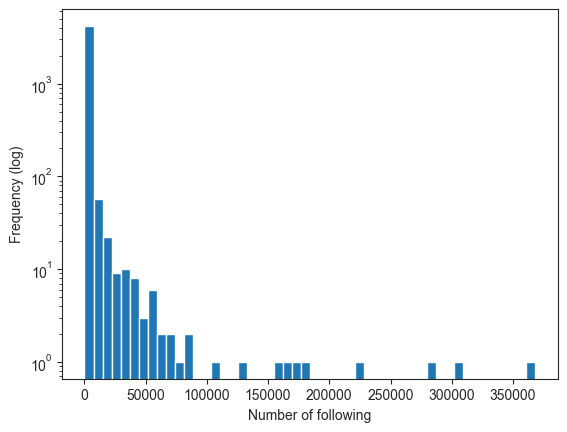

In [18]:
users["following_count"].plot.hist(bins=50, logy=True, xlabel="Number of following", ylabel="Frequency (log)")

In [19]:
display(users[users["following_count"] > 100].shape[0])
display(users[users["following_count"] > 500].shape[0])

955

355

Here, we perform analysis only on individual users, as organizations cannot follow anyone.
We can see that over half of users follow less than 20 accounts, and less than 1000 users follow more than 100.
However, it should be noted that we only collected users based on their number of followers, so it is possible that there are other users that follow more.

### Number of Public Repositories

#### All Accounts

In [20]:
df["public_repositories_count"].describe()

count     5000.000000
mean       152.449200
std        754.894627
min          0.000000
25%         28.000000
50%         66.000000
75%        143.000000
max      31444.000000
Name: public_repositories_count, dtype: float64

<Axes: xlabel='Number of public repositories', ylabel='Frequency (log)'>

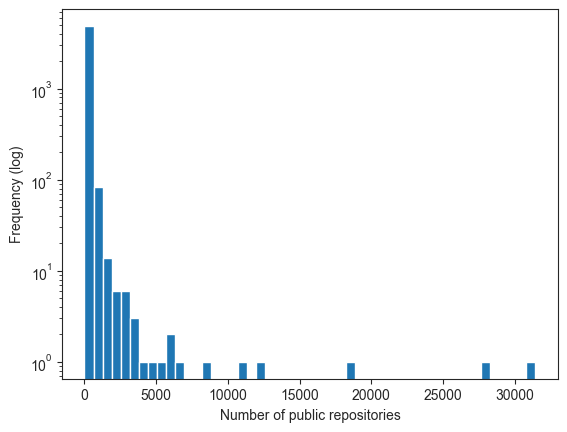

In [21]:
df["public_repositories_count"].plot.hist(bins=50, logy=True, xlabel="Number of public repositories", ylabel="Frequency (log)")

Almost all accounts have less than 150 public repositories.
However, the accounts were not collected based on the number of their repositories, so there may exist accounts with more. 

#### User Accounts

In [22]:
users["public_repositories_count"].describe()

count     4316.000000
mean       130.236098
std        441.752615
min          0.000000
25%         29.000000
50%         67.000000
75%        141.000000
max      18626.000000
Name: public_repositories_count, dtype: float64

<Axes: xlabel='Number of public repositories', ylabel='Frequency (log)'>

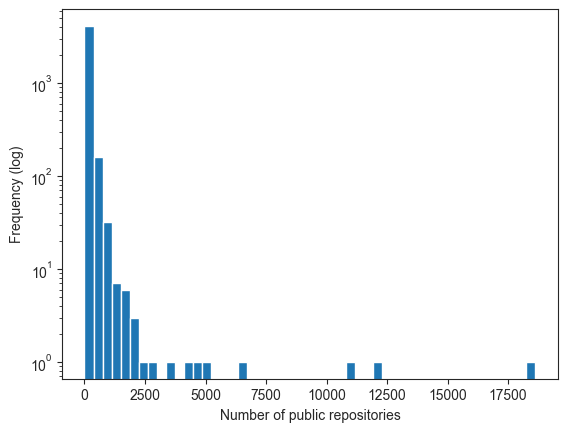

In [23]:
users["public_repositories_count"].plot.hist(bins=50, logy=True, xlabel="Number of public repositories", ylabel="Frequency (log)")

In [24]:
users.sort_values(by="public_repositories_count", ascending=False).head()

,type,username,url,name,homepage,email,company,location,hireable,created_at,updated_at,followers_count,following_count,public_repositories_count,public_gists_count
id,,,,,,,,,,,,,,,
43516554,User,standardgalactic,https://github.com/standardgalactic,Cogito Ergo Sum,None,standardgalactic@protonmail.com,Xanadu,Canada,False,2018-09-23 12:40:35+00:00,2024-07-07 17:35:15+00:00,1378,37427,18626,110
73543858,User,00mjk,https://github.com/00mjk,None,https://m.youtube.com/channel/UCuWi5pi1B92l1Vg...,None,None,None,False,2020-10-27 15:11:31+00:00,2023-08-07 21:34:52+00:00,1628,18519,12106,93
25180681,User,renovate-bot,https://github.com/renovate-bot,Mend Renovate,https://www.mend.io/free-developer-tools/renov...,renovate@whitesourcesoftware.com,@mend,None,False,2017-01-17 16:55:44+00:00,2023-09-13 16:51:11+00:00,1548,0,11105,0
309424,User,killvxk,https://github.com/killvxk,None,None,None,None,USSR,False,2010-06-19 13:47:37+00:00,2024-03-15 08:38:54+00:00,1414,7203,6454,86
443562,User,vim-scripts,https://github.com/vim-scripts,Scrappy Scraper,https://vim-scraper.github.io/,None,None,None,False,2010-10-18 07:02:53+00:00,2020-03-23 17:26:41+00:00,4587,0,5208,0


Of the popular users, Cogito Ergo Sum has the most public repositories with over 18.000 repositories, almost all of which are forks.
This is also the case for many other accounts, except vim-scripts, which provides a GitHub mirror for some Vim scripts and has more than 5000 source repositories.

### Organization Accounts

In [25]:
organizations["public_repositories_count"].describe()

count      684.000000
mean       292.612573
std       1707.420727
min          0.000000
25%         24.000000
50%         64.000000
75%        159.500000
max      31444.000000
Name: public_repositories_count, dtype: float64

<Axes: xlabel='Number of public repositories', ylabel='Frequency (log)'>

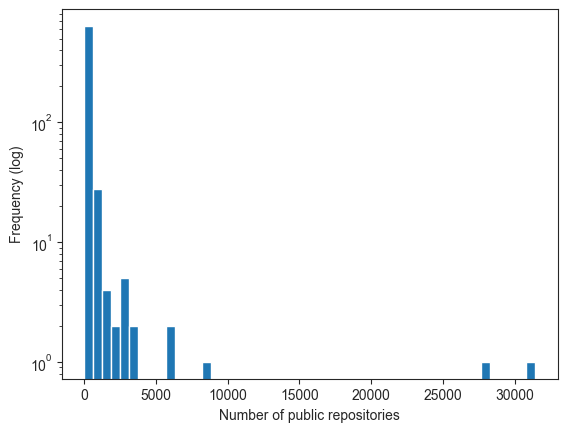

In [26]:
organizations["public_repositories_count"].plot.hist(bins=50, logy=True, xlabel="Number of public repositories", ylabel="Frequency (log)")

In [27]:
organizations.sort_values(by="public_repositories_count", ascending=False).head()

,type,username,url,name,homepage,email,company,location,hireable,created_at,updated_at,followers_count,following_count,public_repositories_count,public_gists_count
id,,,,,,,,,,,,,,,
16607406,Organization,4GeeksAcademy,https://github.com/4GeeksAcademy,4Geeks Academy,http://www.4geeksacademy.com,info@4geeksacademy.com,None,"Online, Madrid, Miami, Santiago de Chile and C...",False,2016-01-08 09:16:02+00:00,2023-11-01 14:42:44+00:00,1787,0,31444,0
6323616,Organization,londonappbrewery,https://github.com/londonappbrewery,London App Brewery,https://www.appbrewery.co,info@londonappbrewery.com,None,London,False,2014-01-05 15:37:11+00:00,2020-01-26 00:53:50+00:00,3192,0,28182,0
10974906,Organization,PacktPublishing,https://github.com/PacktPublishing,Packt,https://www.packtpub.com,None,None,"Birmingham, UK",False,2015-02-12 10:36:37+00:00,2022-11-10 12:04:42+00:00,12047,0,8563,0
6154722,Organization,microsoft,https://github.com/microsoft,Microsoft,https://opensource.microsoft.com,opensource@microsoft.com,None,"Redmond, WA",False,2013-12-10 19:06:48+00:00,2024-02-09 18:50:14+00:00,71498,0,6271,0
8931462,Organization,aws-samples,https://github.com/aws-samples,AWS Samples,https://amazon.com/aws,None,None,None,False,2014-09-26 17:29:50+00:00,2023-05-10 20:47:04+00:00,11259,0,6208,0


On our list, 4Geeks Academy has the most public repositories, almost all of which are source repositories.
This is also the case for London App Brewery, which is again the platform for learning programming.
Out of popular companies, Microsoft has the most public repositories, with over 6000.

### Number of Public Gists

#### All Accounts

In [28]:
df["public_gists_count"].describe()

count    5000.00000
mean       34.32520
std       112.84488
min         0.00000
25%         0.00000
50%         4.00000
75%        28.00000
max      3112.00000
Name: public_gists_count, dtype: float64

<Axes: xlabel='Number of public gists', ylabel='Frequency (log)'>

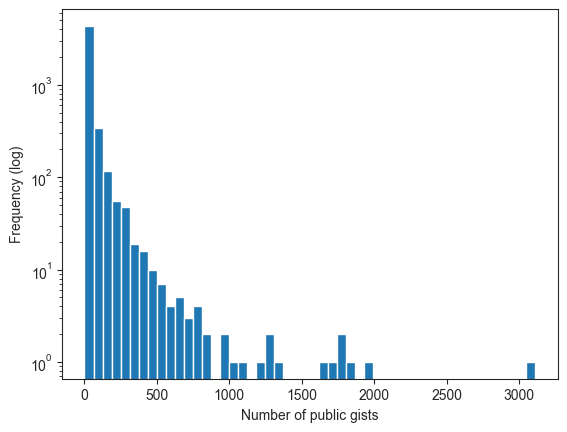

In [29]:
df["public_gists_count"].plot.hist(bins=50, logy=True, xlabel="Number of public gists", ylabel="Frequency (log)")

Almost all accounts have less than 30 public gists.
However, the accounts were not collected based on the number of their gists, so there may exist accounts with more. 

#### User Accounts

In [30]:
users["public_gists_count"].describe()

count    4316.000000
mean       39.751622
std       120.569990
min         0.000000
25%         0.000000
50%         7.000000
75%        34.000000
max      3112.000000
Name: public_gists_count, dtype: float64

<Axes: xlabel='Number of public gists', ylabel='Frequency (log)'>

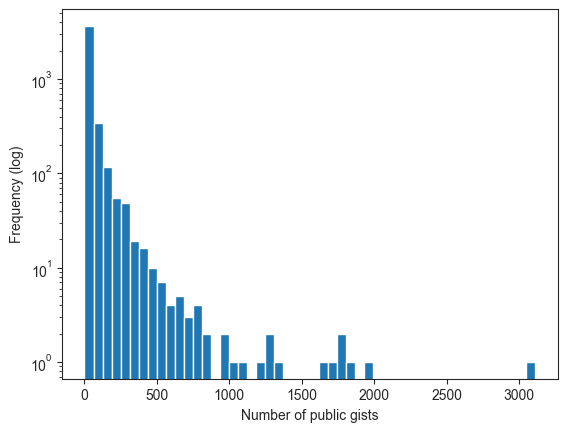

In [31]:
users["public_gists_count"].plot.hist(bins=50, logy=True, xlabel="Number of public gists", ylabel="Frequency (log)")

In [32]:
users.sort_values(by="public_gists_count", ascending=False).head()

,type,username,url,name,homepage,email,company,location,hireable,created_at,updated_at,followers_count,following_count,public_repositories_count,public_gists_count
id,,,,,,,,,,,,,,,
563690,User,bennadel,https://github.com/bennadel,Ben Nadel,https://www.bennadel.com,None,Kinky Solutions,"Rhinebeck, NY",False,2011-01-13 23:19:16+00:00,2024-07-10 18:34:16+00:00,2152,0,132,3112
10111,User,mattn,https://github.com/mattn,mattn,https://mattn.kaoriya.net/,mattn.jp@gmail.com,None,"Osaka, Japan",False,2008-05-13 01:17:13+00:00,2024-06-08 08:35:59+00:00,12058,1703,1994,1936
32314,User,tmcw,https://github.com/tmcw,Tom MacWright,https://macwright.com/,None,@val-town,brooklyn new york,False,2008-11-02 23:44:49+00:00,2024-07-12 20:53:31+00:00,3435,223,302,1806
2041322,User,hanxiao,https://github.com/hanxiao,Han Xiao,jina.ai,han.xiao@jina.ai,@jina-ai,"Berlin, Germany",False,2012-07-25 15:52:49+00:00,2024-07-07 11:20:27+00:00,3791,36,106,1769
6745730,User,NetanelBasal,https://github.com/NetanelBasal,Netanel Basal,https://www.netbasal.com,None,None,Israel,False,2014-02-21 07:56:17+00:00,2024-06-24 11:25:57+00:00,1571,0,189,1750


Most of the accounts with gists are users.

#### Organization Accounts

In [33]:
organizations["public_gists_count"].describe()

count    684.000000
mean       0.084795
std        0.768221
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       12.000000
Name: public_gists_count, dtype: float64

<Axes: xlabel='Number of public gists', ylabel='Frequency (log)'>

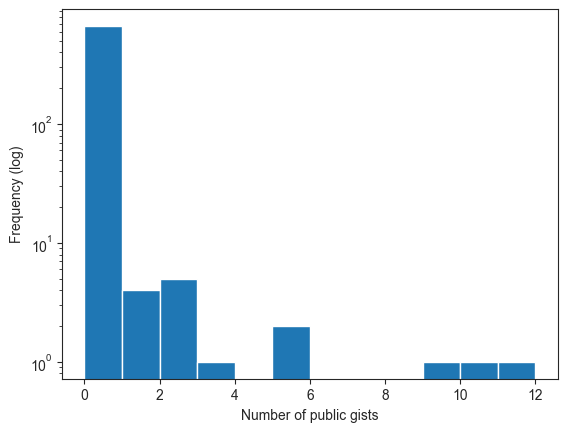

In [34]:
organizations["public_gists_count"].plot.hist(bins=12, logy=True, xlabel="Number of public gists", ylabel="Frequency (log)")

In [35]:
organizations.sort_values(by="public_gists_count", ascending=False).head()

,type,username,url,name,homepage,email,company,location,hireable,created_at,updated_at,followers_count,following_count,public_repositories_count,public_gists_count
id,,,,,,,,,,,,,,,
69631,Organization,facebook,https://github.com/facebook,Meta,https://opensource.fb.com,None,None,"Menlo Park, California",False,2009-04-02 03:35:22+00:00,2022-04-01 07:03:49+00:00,24173,0,137,12
8085,Organization,Shopify,https://github.com/Shopify,Shopify,https://shopify.engineering/,engineering@shopify.engineering,None,The Internet,False,2008-04-21 18:02:10+00:00,2023-06-30 18:58:31+00:00,5148,0,1051,10
5470001,Organization,lewagon,https://github.com/lewagon,Le Wagon,https://www.lewagon.com,contact@lewagon.com,None,"Paris, London, Berlin & more",False,2013-09-16 13:20:52+00:00,2024-01-26 00:07:32+00:00,3446,0,175,9
9892522,Organization,freeCodeCamp,https://github.com/freeCodeCamp,freeCodeCamp.org,https://freecodecamp.org,None,None,United States of America,False,2014-11-22 00:12:57+00:00,2024-07-09 07:31:20+00:00,24214,0,226,5
82592,Organization,square,https://github.com/square,Square,https://square.github.io,None,None,None,False,2009-05-08 23:28:44+00:00,2024-06-13 06:56:48+00:00,2100,0,294,5


Only a few of the organizations on our list have any public gists.
Popular organizations with the most gists are Facebook and Shopify.

## Boolean Properties

We can also analyze a few interesting boolean properties about users.

In [36]:
def number_of_with_without(series: pd.Series, df: pd.DataFrame = df) -> (int, int):
    """Returns the number of rows that do and do not match the boolean series."""
    return df[series].shape[0], df[~series].shape[0]

In [37]:
# Number of accounts with/without name
number_of_with_without(~df["name"].isnull())

(4723, 277)

In [38]:
# Number of accounts with/without homepage
number_of_with_without(~df["homepage"].isnull())

(3986, 1014)

In [39]:
# Number of accounts with/without email
number_of_with_without(~df["email"].isnull())

(2451, 2549)

In [40]:
# Number of accounts with/without location
number_of_with_without(~df["location"].isnull())

(3754, 1246)

In [41]:
# Number of users with/without company
number_of_with_without(~users["company"].isnull(), users)

(2586, 1730)

In [42]:
# Number of users that are hireable
number_of_with_without(users["hireable"], users)

(1163, 3153)

Almost all the accounts have a name set, and only less than 300 do not.
Most of the accounts also specify their homepage and the location.
However, they are almost equally split on disclosing their email.
More than half of the user accounts specify their company, and most of them are not hireable. 

## Date Properties

We know when each user was created and last updated.

### Created Date

The created date contains the date and time when the account was created.

In [43]:
df["created_at"].describe()

count                                   5000
mean     2014-04-16 00:30:05.969999872+00:00
min                2007-10-20 05:24:19+00:00
25%                2011-04-28 23:07:08+00:00
50%         2013-09-20 08:31:09.500000+00:00
75%         2016-10-18 02:18:39.500000+00:00
max                2024-06-12 02:05:28+00:00
Name: created_at, dtype: object

In [44]:
users.sort_values(by="created_at")

,type,username,url,name,homepage,email,company,location,hireable,created_at,updated_at,followers_count,following_count,public_repositories_count,public_gists_count
id,,,,,,,,,,,,,,,
2,User,defunkt,https://github.com/defunkt,Chris Wanstrath,http://chriswanstrath.com/,None,None,None,False,2007-10-20 05:24:19+00:00,2024-05-25 22:31:18+00:00,22325,215,107,274
1,User,mojombo,https://github.com/mojombo,Tom Preston-Werner,http://tom.preston-werner.com,tom@mojombo.com,"@chatterbugapp, @redwoodjs, @preston-werner-ve...",San Francisco,False,2007-10-20 05:24:19+00:00,2024-06-20 20:33:22+00:00,23948,11,66,62
3,User,pjhyett,https://github.com/pjhyett,PJ Hyett,https://hyett.com,pj@hyett.com,"GitHub, Inc.",San Francisco,False,2008-01-07 17:54:22+00:00,2024-01-22 12:11:10+00:00,8289,30,8,21
4,User,wycats,https://github.com/wycats,Yehuda Katz,http://yehudakatz.com,wycats@gmail.com,@tildeio,"Portland, OR",False,2008-01-12 05:38:33+00:00,2024-07-08 19:34:07+00:00,10204,13,294,763
7,User,evanphx,https://github.com/evanphx,Evan Phoenix,https://evanphx.dev,evan@phx.io,@hashicorp,"Los Angeles, CA",False,2008-01-12 16:46:24+00:00,2024-06-30 22:20:05+00:00,1633,9,182,445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167228919,User,NitrixXero,https://github.com/NitrixXero,Elijah Gordon,None,None,None,Greece,False,2024-04-16 16:00:05+00:00,2024-05-24 22:12:45+00:00,1329,0,15,0
170892541,User,LegendaryNaix,https://github.com/LegendaryNaix,Super Coding Star,None,LegendaryNaix@outlook.com,None,None,True,2024-05-26 20:46:38+00:00,2024-07-10 17:29:18+00:00,1527,3677,49,0
171361497,User,MightyTechNinja,https://github.com/MightyTechNinja,MightyTechNinja,None,mightytechninja@gmail.com,Personal Developer,None,False,2024-05-31 15:19:10+00:00,2024-07-12 11:56:57+00:00,1423,1949,35,0


In [45]:
organizations.sort_values(by="created_at")

,type,username,url,name,homepage,email,company,location,hireable,created_at,updated_at,followers_count,following_count,public_repositories_count,public_gists_count
id,,,,,,,,,,,,,,,
4223,Organization,rails,https://github.com/rails,Ruby on Rails,https://rubyonrails.org/,None,None,None,False,2008-04-02 01:59:25+00:00,2021-09-13 14:26:11+00:00,1837,0,124,3
8085,Organization,Shopify,https://github.com/Shopify,Shopify,https://shopify.engineering/,engineering@shopify.engineering,None,The Internet,False,2008-04-21 18:02:10+00:00,2023-06-30 18:58:31+00:00,5148,0,1051,10
9919,Organization,github,https://github.com/github,GitHub,https://github.com/about,None,None,"San Francisco, CA",False,2008-05-11 04:37:31+00:00,2022-11-29 19:44:55+00:00,40604,0,496,0
18133,Organization,git,https://github.com/git,Git,https://git-scm.com,None,None,None,False,2008-07-23 14:16:55+00:00,2024-07-04 12:20:19+00:00,2774,0,7,0
23211,Organization,heroku,https://github.com/heroku,Heroku,https://heroku.com/,None,None,"San Francisco, CA",False,2008-09-04 20:53:06+00:00,2023-04-28 23:13:51+00:00,1528,0,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152806972,Organization,100xdevs-cohort-2,https://github.com/100xdevs-cohort-2,None,None,None,None,None,False,2023-12-03 17:58:30+00:00,2023-12-03 17:58:30+00:00,1912,0,34,0
153379578,Organization,meta-llama,https://github.com/meta-llama,Meta Llama,https://llama.meta.com/,None,None,None,False,2023-12-09 15:49:39+00:00,2024-03-13 20:07:36+00:00,2237,0,5,0
160199024,Organization,instructlab,https://github.com/instructlab,InstructLab,https://instructlab.ai/,None,None,None,False,2024-02-16 02:39:40+00:00,2024-05-21 07:00:05+00:00,1512,0,15,0


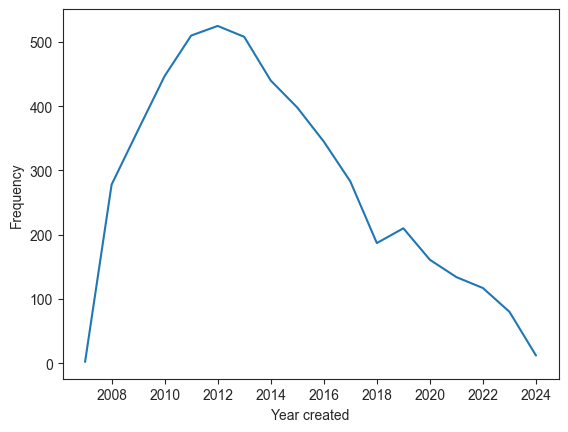

In [46]:
ax = df.groupby(df["created_at"].dt.year).size().plot(xlabel="Year created", ylabel="Frequency")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

Most accounts have been created before 2014.
The oldest users (and accounts overall) are Tom Preston-Werner, Chris Wanstrath and P. J. Hyett, the founders of GitHub.
The oldest organizations are Ruby on Rails and Shopify, which are even older than the GitHub organization.

### Updated Date

The updated date represents when the account was last updated, like changing the about field, email, website or location.

In [47]:
users["updated_at"].describe()

count                                   4316
mean     2024-04-10 11:04:21.566497024+00:00
min                2017-06-06 16:59:56+00:00
25%         2024-05-04 19:12:03.500000+00:00
50%         2024-06-21 05:31:17.500000+00:00
75%      2024-07-05 23:17:40.750000128+00:00
max                2024-07-14 01:16:25+00:00
Name: updated_at, dtype: object

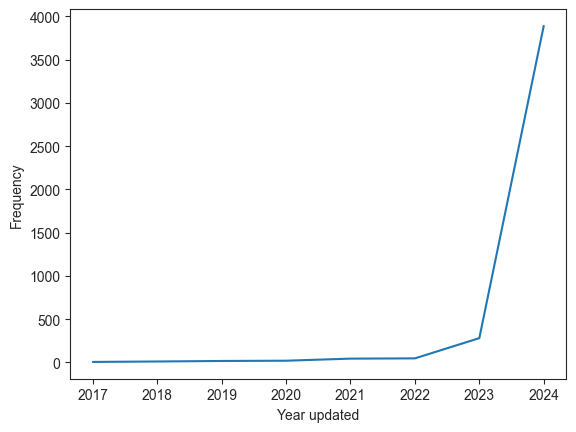

In [48]:
ax = users.groupby(users["updated_at"].dt.year).size().plot(xlabel="Year updated", ylabel="Frequency")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

In [49]:
organizations["updated_at"].describe()

count                                    684
mean     2023-08-14 06:11:30.201754368+00:00
min                2017-01-11 21:59:59+00:00
25%         2023-04-04 15:22:02.500000+00:00
50%                2024-02-24 05:04:07+00:00
75%         2024-06-19 11:35:40.500000+00:00
max                2024-07-13 17:08:27+00:00
Name: updated_at, dtype: object

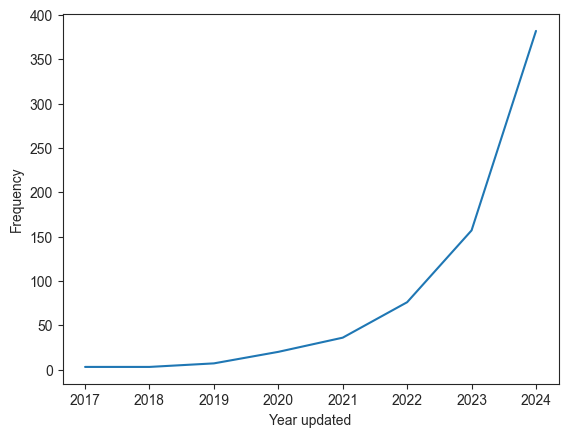

In [50]:
ax = organizations.groupby(organizations["updated_at"].dt.year).size().plot(xlabel="Year updated", ylabel="Frequency")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

We can see that the user accounts are more regularly updated than the organization ones.

## Companies

We can check where the most popular users are employed.
This is done only for user accounts, as organizations cannot have a company specified.

In [51]:
# We normalize the company names and convert them to lowercase
companies = users["company"].str.replace("@", "").str.strip().str.lower()

In [52]:
companies.describe()

count       2586
unique      1987
top       google
freq          80
Name: company, dtype: object

In [53]:
companies.value_counts()

company
google         80
microsoft      78
bytedance      29
github         25
alibaba        22
               ..
toptal          1
imatix          1
zenith bank     1
auth0           1
cnrs            1
Name: count, Length: 1987, dtype: int64

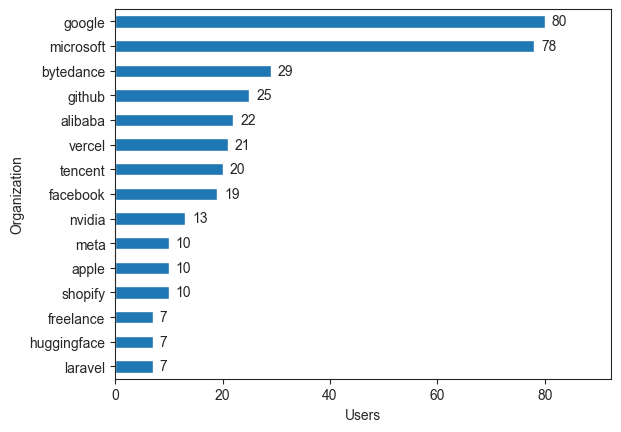

In [54]:
ax = companies.value_counts().nlargest(15).plot.barh()
ax.set_xlabel("Users")
ax.set_ylabel("Organization")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

We can see that users are employed by many different companies.
Google and Microsoft are employing the most users.
Note that the results here are not exact, as the normalization of the company name is not perfect.

## Locations

We will analyze where the most popular accounts are located.

In [55]:
gc = Geocode()
gc.load()

### All Accounts

In [56]:
all_locations = gc.decode_parallel(df["location"].to_list()) # Geocode locations for all accounts
all_locations = [location[0] for location in all_locations if location] # Get the first match for each location
all_locations = pd.DataFrame(all_locations) # Convert locations into dataframe

2024-07-16 17:25:16,248 [INFO ] [geocode.geoc]: Running decode in parallel with 7 cores
100%|██████████| 7/7 [00:00<00:00, 74.26it/s]


In [57]:
all_locations

,name,official_name,country_code,longitude,latitude,geoname_id,location_type,population
0,Portland,Portland,US,-122.67621,45.52345,5746545,city,652503
1,Singapore,Singapore,SG,103.85007,1.28967,1880252,city,5638700
2,Rio de Janeiro,Rio de Janeiro,BR,-43.18223,-22.90642,3451190,city,6747815
3,Shanghai,Shanghai,CN,121.45806,31.22222,1796236,city,22315474
4,Shanghai,Shanghai,CN,121.45806,31.22222,1796236,city,22315474
...,...,...,...,...,...,...,...,...
3489,Fuzhou,Fuzhou,CN,119.30611,26.06139,1810821,city,3740000
3490,New Delhi,New Delhi,IN,77.21480,28.62137,1261481,city,317797
3491,China,People’s Republic of China,CN,105.00000,35.00000,1814991,country,1411778724
3492,San Francisco,San Francisco,US,-122.41942,37.77493,5391959,city,864816


There are slightly less than 3500 accounts whose locations could be decoded.

In [58]:
all_locations["country_code"].value_counts()

country_code
US    1120
CN     561
GB     188
DE     154
BR     151
      ... 
JM       1
CL       1
GH       1
EE       1
EC       1
Name: count, Length: 109, dtype: int64

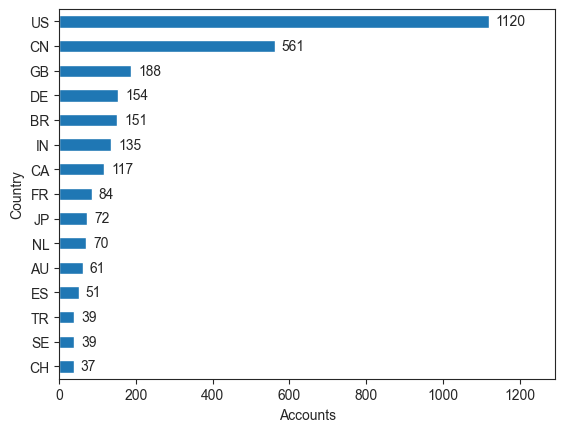

In [59]:
ax = all_locations["country_code"].value_counts().nlargest(15).plot.barh()
ax.set_xlabel("Accounts")
ax.set_ylabel("Country")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

The most commonly detected country of popular accounts is the United States with over 1000 accounts.
China is in the second place with more than 500 accounts, followed by the United Kingdom which has around slightly less than 200 accounts.

For a more visual representation, we can draw a map of account locations.

In [60]:
worldmap = folium.Map(location=[35, 0], zoom_start=2, tiles="Cartodb dark_matter")
folium.plugins.HeatMap(all_locations[["latitude", "longitude"]]).add_to(worldmap)
worldmap

### User Accounts

In [61]:
user_locations = gc.decode_parallel(users["location"].to_list()) # Geocode locations for user accounts
user_locations = [location[0] for location in user_locations if location] # Get the first match for each location
user_locations = pd.DataFrame(user_locations) # Convert locations into dataframe

2024-07-16 17:25:25,491 [INFO ] [geocode.geoc]: Running decode in parallel with 7 cores
100%|██████████| 7/7 [00:00<00:00, 1671.61it/s]


In [62]:
user_locations["country_code"].value_counts()

country_code
US    979
CN    536
GB    173
DE    143
BR    141
     ... 
CL      1
GH      1
EE      1
EC      1
SK      1
Name: count, Length: 107, dtype: int64

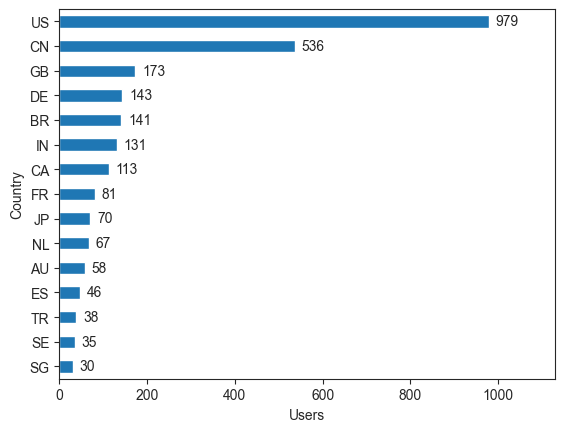

In [63]:
ax = user_locations["country_code"].value_counts().nlargest(15).plot.barh()
ax.set_xlabel("Users")
ax.set_ylabel("Country")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

We can see that a list of countries with the most user accounts is also very similar. 

### Organization Accounts

In [64]:
organization_locations = gc.decode_parallel(organizations["location"].to_list()) # Geocode locations for organization accounts
organization_locations = [location[0] for location in organization_locations if location] # Get the first match for each location
organization_locations = pd.DataFrame(organization_locations) # Convert locations into dataframe

2024-07-16 17:25:36,193 [INFO ] [geocode.geoc]: Running decode in parallel with 7 cores
100%|██████████| 7/7 [00:00<00:00, 1437.67it/s]


In [65]:
organization_locations["country_code"].value_counts()

country_code
US    141
CN     25
GB     15
DE     11
BR     10
CH      9
ES      5
CA      4
IN      4
HK      4
SE      4
FR      3
SG      3
AU      3
NL      3
KY      2
CU      2
JP      2
CZ      2
BE      2
DK      1
SK      1
GR      1
NO      1
PL      1
CY      1
UA      1
LV      1
AE      1
KR      1
ID      1
AR      1
RU      1
BJ      1
FI      1
SV      1
TR      1
Name: count, dtype: int64

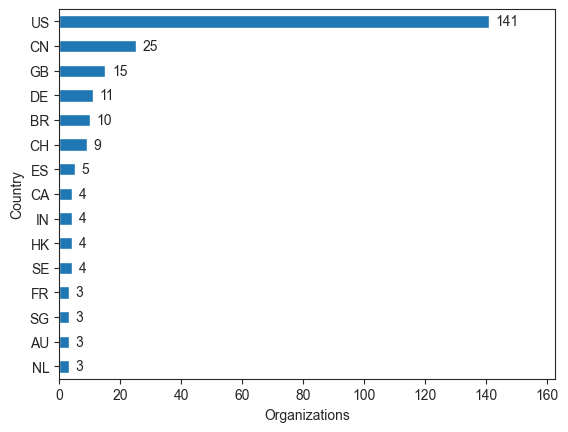

In [66]:
ax = organization_locations["country_code"].value_counts().nlargest(15).plot.barh()
ax.set_xlabel("Organizations")
ax.set_ylabel("Country")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

The same is also true for the organization accounts.

In [67]:
# TODO: Relationship between counts